In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go
from wordcloud import WordCloud
import string
from scipy.stats import t

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

def mean_confidence_interval(x, conf=95):
    """
    Compute a confidence interval for the mean of the values in x.

    Params:
        x:    -> Array with the values to compute the mean confidence interval.
        conf: -> Level of confidence (0 < conf < 100)

    Returns:
        conf: -> Confidence interval [lim_inf, lim_sup]
    """
    
    mean = np.mean(x)
    tsign = np.abs(t.ppf((1-conf/100)/2, len(x)-1))
    std = np.std(x, ddof=1)
    std_error = std / np.sqrt(len(x))
    conf = [mean - tsign*std_error, mean + tsign*std_error]
    return conf

/kaggle/input/spotify-music/Popular_Spotify_Songs.csv


<img src='https://respontodo.com/wp-content/uploads/2021/11/1-spotify-code.png' style='width:80%; margin:0 auto;'>

# <div style="line-height:50px;padding:0 10px;color:#27EF3A;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:white'>1 ❯</span></b> <b>BACKGROUND</b></div>

Spotify stands as the premier global music streaming platform, boasting approximately 80 million songs with nearly 60,000 fresh additions daily. Despite this vast library, certain tracks rise to prominence as the most popular on the platform. In this notebook, we'll be analyzing a dataset of the most popular songs in Spotify of all the time (measured by the total streming times).

### <b><span style='color:#27EF3A;text-align:center'>❯❯❯ </span> Notebook AIM
    
In this notebook, we'll be diving into a list of popular Spotify songs. We'll use Exploratory Data Analysis (EDA) to uncover trends and interesting details within the data of the most popular songs on Spotify (by total streams). By creating clear visualizations, we'll share our findings in an easy-to-understand way.
    
### <b><span style='color:#27EF3A;text-align:center'>❯❯❯ </span> Dataset content.
    
The dataset used in this notebook contains a list of the 953 most streamed songs in Spotify. Each track has the next 24 features. 
    
<ul>
    <li><span style='color:#4C8C21;font-weight:bold'>Track_name:</span>Name of the song</li>
    <li><span style='color:#4C8C21;font-weight:bold'>Artist's_name:</span>Name of the artist(s) who sing the song.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>Artist_count</span>Count of artists who participaded in the song.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>Released_year</span>Year when the track was released.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>Released_month:</span>Month when the track was released.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>Released_day:</span>Day when the track was released.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>In_spotify_playlists:</span>Count of playlists in which the track was included on Spotify</li>
    <li><span style='color:#4C8C21;font-weight:bold'>In_deezer_playlists:</span>Count of playlists in which the track was included on Deezer</li>
    <li><span style='color:#4C8C21;font-weight:bold'>In_amazon_playlists:</span>Count of playlists in which the track was included on Amazon Music</li>
    <li><span style='color:#4C8C21;font-weight:bold'>Streams:</span>Total streams of the song.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>In_spotify_charts:</span>Count of Spotify charts in which the track was included in.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>In_deezer_charts:</span>Count of Deezer charts in which the track was included in.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>In_apple_charts:</span>Count of Apple Music charts in which the track was included in.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>In_zhazam_charts:</span>Count of Zhazam charts in which the track was included in.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>btm:</span>Beats Per Minute.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>danceability_%:</span>A value assigned to the song that indicates how suitable it is for dancing</li>
    <li><span style='color:#4C8C21;font-weight:bold'>valence_%:</span>A value assigned to the song that indicates how "positivity" (100%) or negativity (0%) is.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>energy_%:</span>A value indicating the relative level of "energy" in a song.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>acousticness_%:</span>A value assigned to a song that indicates how reliant it is on acoustic instruments</li>
    <li><span style='color:#4C8C21;font-weight:bold'>liveness_%:</span>A value indicating the likelihood a song was recorded in a live setting with an audience.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>speechiness_%:</span>A value indicating the presence of spoken word content.</li>
    <li><span style='color:#4C8C21;font-weight:bold'>instrumentalness_%:</span>A value indicating  how much of a song is instrumental.</li>
<ul>

# <div style="line-height:50px;padding:0 10px;color:#27EF3A;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:white'>2 ❯</span></b> <b>Dataset inspection</b></div>

In [2]:
data = pd.read_csv('/kaggle/input/spotify-music/Popular_Spotify_Songs.csv', encoding='latin 1')
print(data.shape)
data.head().T

(953, 24)


,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147,48,113,100,50
streams,141381703,133716286,140003974,800840817,303236322
in_apple_playlists,43,48,94,116,84



The dataset has data for the 953 most popular songs on Spotify, as determined by total streaming numbers. It includes 24 features describing each song, such as artist name, release date, streaming statistics on Spotify and other platforms, musical attributes like mode and key, as well as various audio features.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob


The columns <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>streams</i>, <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>in_deezer_playlists</i> and <i style='color:rgba(250, 100, 108, 1);font-weight:bold;'>in_zhazam_charts</i> seems to be numerical. However, they are loaded as object (strings). First, let's see what's the problem.


In [4]:
def is_number(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

print(data.streams[~data.streams.apply(is_number)])

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


In [5]:
print(data.in_deezer_playlists[~data.in_deezer_playlists.apply(is_number)])

48     2,445
54     3,394
55     3,421
65     4,053
73     1,056
       ...  
761    2,453
762    2,430
871    6,720
893    1,315
910    7,827
Name: in_deezer_playlists, Length: 79, dtype: object


In [6]:
print(data.in_shazam_charts[~data.in_shazam_charts.apply(is_number)])

12    1,021
13    1,281
17    1,173
24    1,093
44    1,133
88    1,451
89    1,170
Name: in_shazam_charts, dtype: object



The problem with this columns are: 
    <ul>
        <li><span style='color:rgba(250, 100, 108, 1);font-weight:bold;'>Streams: </span> There is an incorrect value at index 547. We'll impute this value with the mean.</li>
        <li><span style='color:rgba(250, 100, 108, 1);font-weight:bold;'>in_deezer_playlists: </span> It uses a comma-separated format for thousands.</li>
        <li><span style='color:rgba(250, 100, 108, 1);font-weight:bold;'>in_shazam_charts: </span> It uses a comma-separated format for thousands.</li>
    </ul>
    
Let's fix them

In [7]:
data.streams = data.streams.apply(lambda val: int(val) if is_number(val) else np.nan)
data.streams = data.streams.fillna(data.streams.mean()).astype(int)
data.in_shazam_charts = data.in_shazam_charts.apply(
    lambda val: int(val.replace(',','')) if isinstance(val, str) else np.nan)
data.in_deezer_playlists = data.in_deezer_playlists.apply(
    lambda val: int(val.replace(',', '')) if isinstance(val, str) else np.nan
)


Now that the data dypes are corrected, let's get some descriptive statisticas about the different types of variables, like the <b>type of variable</b>, <b>the number of categories</b> (for qualitative variables), and the <b>min, max, avg and variability (standard deviation)</b>, as well as the number of <b>missing values</b>.


In [8]:
data_description = pd.DataFrame({
    'Type': data.dtypes,
    'Qualitative/Quantitative': ['Qualitative' if var==object or col.find('released')>=0 else 'Quantitative' for var, col in zip(data.dtypes, data.columns)],
    'Uniques': [len(data[col].unique()) if dtype==object else '-' for col, dtype in zip(data.columns, data.dtypes)],
    'Min': [data[col].min() if dtype==int else '-' for col, dtype in zip(data.columns, data.dtypes)],
    'Max': [data[col].max() if dtype==int else '-' for col, dtype in zip(data.columns, data.dtypes)],
    'Avg':  [data[col].mean() if dtype==int else '-' for col, dtype in zip(data.columns, data.dtypes)],
    'Std': [data[col].std().round(1) if dtype==int else '-' for col, dtype in zip(data.columns, data.dtypes)], 
    'Missing': [data[col].isnull().sum() for col in data.columns]
}).sort_values(by='Qualitative/Quantitative')

data_description

,Type,Qualitative/Quantitative,Uniques,Min,Max,Avg,Std,Missing
track_name,object,Qualitative,943,-,-,-,-,0
artist(s)_name,object,Qualitative,645,-,-,-,-,0
released_year,int64,Qualitative,-,1930,2023,2018.238195,11.1,0
released_month,int64,Qualitative,-,1,12,6.033578,3.6,0
released_day,int64,Qualitative,-,1,31,13.930745,9.2,0
mode,object,Qualitative,2,-,-,-,-,0
key,object,Qualitative,12,-,-,-,-,95
instrumentalness_%,int64,Quantitative,-,0,91,1.581322,8.4,0
acousticness_%,int64,Quantitative,-,0,97,27.057712,26.0,0
energy_%,int64,Quantitative,-,9,97,64.279119,16.6,0



<ul>
<li>There are <b>four categorical variables</b>, all measured at the nominal level. Additionally, there are <b>17 quantitative variables</b>. Among these, the audio features—instrumentalness, acousticness, energy, valence, danceability, liveness, and speechiness—are expressed as percentages, ranging from 0% to 100%, with no apparent outliers. Although the maximum value appears to be 97%. The variable 'bpm' ranges from 65 to 206, which are typical values for this feature.</li>

<li>   The released date (expressed in released_day, released_month, and released_year) ranges from 1930 to 2023, and seems to include all months and all days of the month, with no apparent outliers.
        </li>
<li>
    The streaming statistics features, including 'streams', as well as the number of playlists and charts featuring the song across different platforms, appear to have consistent ranges without any outliers.
        </li>
<li>
    The categorial 'key' feature includes all 12 common Western music scales, and the 2 common 'mode's (major and minor).
        </li>
   <li>
Out of the 943 popular songs on Spotify, there are 645 unique artists, indicating that some artists have more than one popular song within this list.
        </li>
    </ul>

    

Two features out of the 24 have null values: 'in_shazam_charts' (50) and 'key' (95).


# <div style="line-height:50px;padding:0 10px;color:#27EF3A;margin:0;font-size:60%;text-align:left;display:fill;border-radius:10px;background-color:#FFFFFF;overflow:hidden;background-color:#17202a "><b><span style='color:white'>3 ❯</span></b> <b>Trends and Insights</b></div>

## <span style='color:#17202a;font-weight:bold;font-size:80%; background: rgba(38, 230, 57, 0.4); padding: 5px 50px; border-radius:5px;'>>>> Number of songs by released date</span>

[Text(0, 0.5, 'Count'), Text(0, 0.5, 'Count'), Text(0, 0.5, 'Count')]

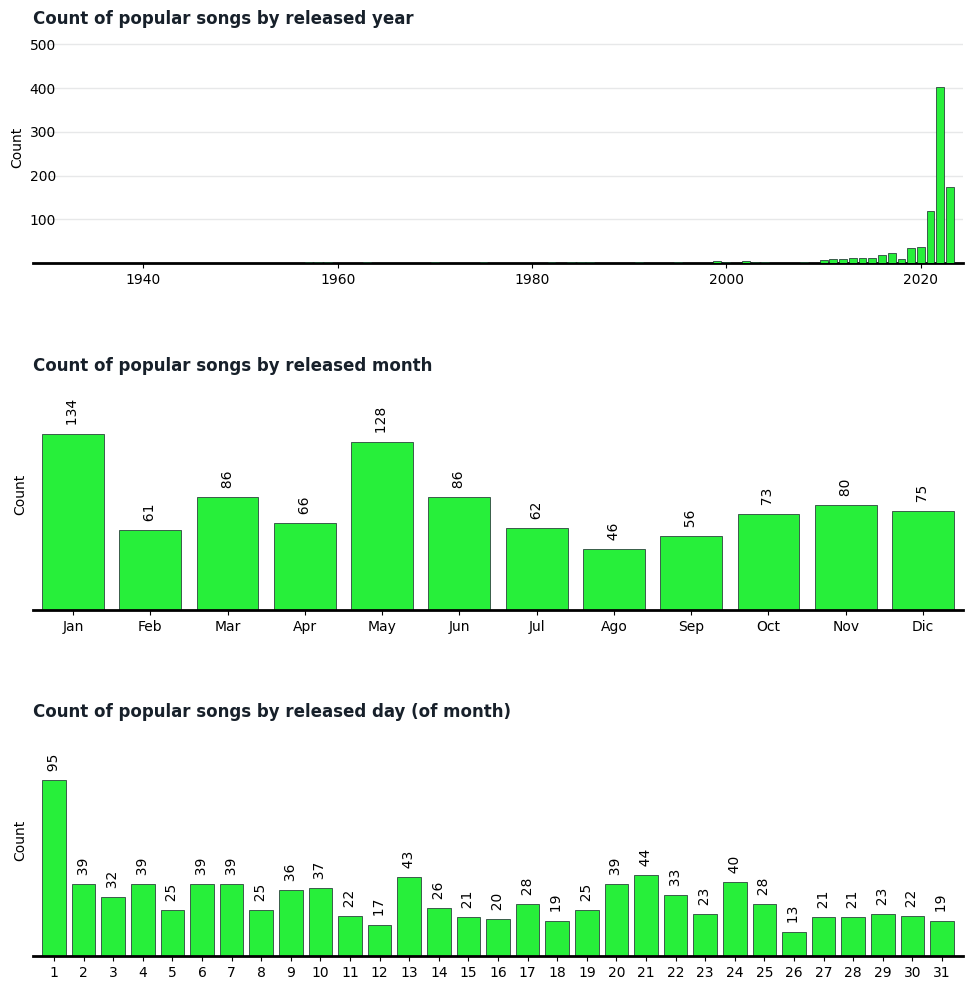

In [9]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

fig, ax = plt.subplots(3, 1, figsize=(12, 12))

ax[0].bar(data.released_year.value_counts().index,
          data.released_year.value_counts(), color='#27EF3A',  
          edgecolor='#17202A', lw=0.5, zorder=10)
bars1 = ax[1].bar(months,
                  data.released_month.value_counts().sort_index(), color='#27EF3A', 
                  edgecolor='#17202A', lw=0.5)
bars2 = ax[2].bar(data.released_day.value_counts().sort_index().index, 
                  data.released_day.value_counts().sort_index(), color='#27EF3A',
                  edgecolor='#17202A', lw=0.5)

for axi in ax:
    axi.margins(x=0.01)
    axi.spines[['left', 'right', 'top']].set_visible(False)
    axi.spines['bottom'].set_lw(2)
    axi.set_ylim(0, 1.25*axi.get_ylim()[-1])
    
for i, bar in enumerate(bars1 + bars2):
    axi = ax[1] if i < len(bars1) else ax[2]
    x, y = bar.get_x() + bar.get_width()/2, bar.get_height()
    axi.text(s=f'  {y}', x=x, y=y, rotation=90, ha='center', va='bottom');
    
plt.setp(ax[1:], yticks=[])
ax[0].grid(color='#17202A', alpha=0.1, lw=1, axis='y')
ax[2].xaxis.set_major_locator(plt.MultipleLocator(1))

ax[0].yaxis.set_major_locator(plt.MultipleLocator(100))
ax[0].tick_params(axis='y', left=False, pad=-20)
ax[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda yi, ri: f'{yi:.0f}' if yi>0 else ''))

ax[0].set_title('Count of popular songs by released year', loc='left', 
                fontweight='bold', color='#17202A')
ax[1].set_title('Count of popular songs by released month', loc='left', 
                fontweight='bold', color='#17202A')
ax[2].set_title('Count of popular songs by released day (of month)', loc='left', 
                fontweight='bold', color='#17202A')
plt.subplots_adjust(hspace=0.5)
plt.setp(ax, ylabel='Count')

The released year of the most popular spotify songs ranges from 1930 to 2023. However, almost 9 out of 10 of these popular songs are from the last 10 years (88.5%). January and May are the months with most popular songs. Also, the 1st day of the month seems to have a high number of popular songs (possibly, artists tend to release their music on the first day of the month).

## <span style='color:#17202a;font-weight:bold;font-size:80%; background: rgba(38, 230, 57, 0.4); padding: 5px 50px; border-radius:5px;'>>>> Oldest songs in the popular spotify songs list</span>

In [10]:
oldest_songs = (
    data[data.released_year<1960]\
    [['released_year', 'artist(s)_name', 'track_name']]
    .reset_index(drop=True)
    .sort_values(by='released_year')
)

oldest_songs

,released_year,artist(s)_name,track_name
0,1930,"Styrx, utku INC, Thezth",Agudo Mï¿½ï¿½gi
7,1942,"Bing Crosby, John Scott Trotter & His Orchestr...",White Christmas
5,1946,Nat King Cole,The Christmas Song (Merry Christmas To You) - ...
6,1950,"Frank Sinatra, B. Swanson Quartet",Let It Snow! Let It Snow! Let It Snow!
4,1952,Burl Ives,A Holly Jolly Christmas - Single Version
2,1957,Bobby Helms,Jingle Bell Rock
11,1957,Frank Sinatra,Jingle Bells - Remastered 1999
1,1958,Brenda Lee,Rockin' Around The Christmas Tree
8,1958,"Perry Como, The Fontane Sisters, Mitchell Ayre...",It's Beginning to Look a Lot Like Christmas (w...
10,1958,Chuck Berry,Run Rudolph Run - Single Version


Text(0.0, 1.0, 'Common words in oldest popular songs')

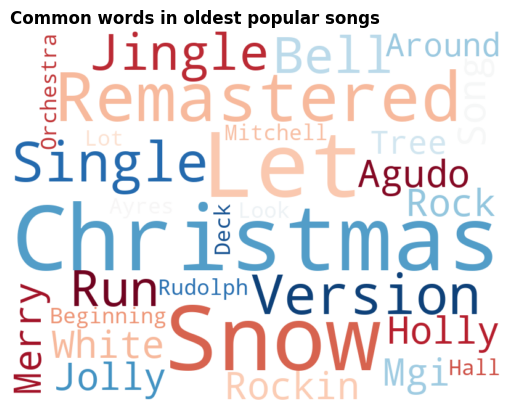

In [11]:
track_names = ' '.join(oldest_songs.track_name)
track_names = ''.join([char if char in string.ascii_letters + ' ' else '' for char in track_names])
track_names


# Crear una instancia de WordCloud
nube_palabras = WordCloud(background_color="white", max_words=200, width=800, height=600, 
                          colormap=plt.colormaps['RdBu'])

# Generar la nube de palabras
nube_palabras.generate(track_names.title())

# Mostrar la nube de palabras
plt.imshow(nube_palabras, interpolation="bilinear")
plt.axis("off")
plt.gca().set_title('Common words in oldest popular songs', loc='left', 
                    weight='bold')

All the oldest popular songs in spotify (released before 1960) seems to be about christmas (except the first one from 1930).

## <span style='color:#17202a;font-weight:bold;font-size:80%; background: rgba(38, 230, 57, 0.4); padding: 5px 50px; border-radius:5px;'>>>> Artists with most popular songs</span>

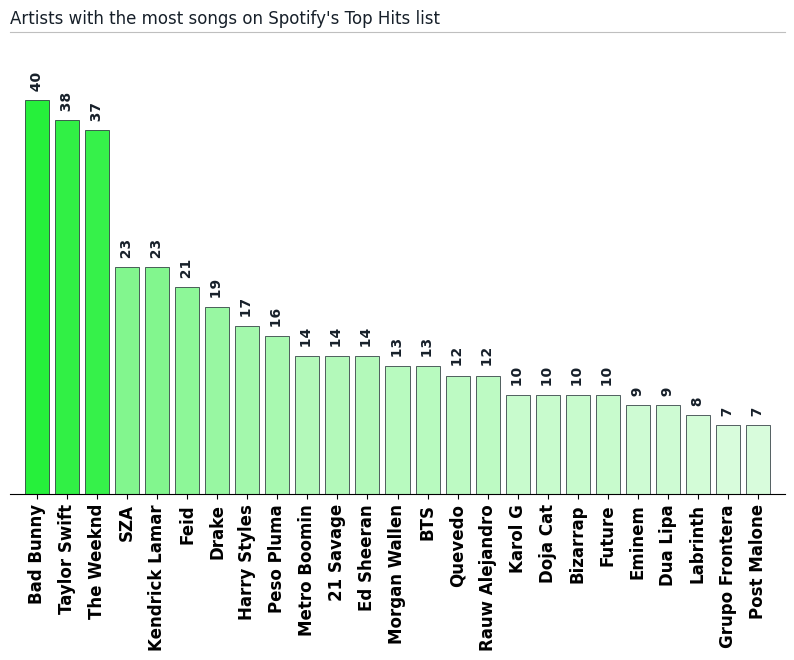

In [12]:
# We need to split artists in songs with multiple artists

count_by_artist = count_by_artist = pd.Series(','.join(data['artist(s)_name']).split(',')).str.strip().value_counts().head(25)

fig, ax = plt.subplots(figsize=(10, 6))
ax.margins(x=0.02)

colors = [(.15, .94, .23, vi/count_by_artist.max()) 
          for vi in count_by_artist]
bars = ax.bar(count_by_artist.index, count_by_artist, 
              color=colors, edgecolor='#17202A', lw=0.5)
ax.tick_params(axis='x', rotation=90)
for label in ax.get_xticklabels():
    label.set(ha='right')
ax.spines[['right', 'left']].set_visible(False)
ax.spines['top'].set_alpha(0.25)
ax.set_yticks([])

for bar in bars:
    ax.annotate(
        f'  {bar.get_height():.0f}', 
        xy=(bar.get_x() + bar.get_width()/2, bar.get_height()), 
        color='#17202A', 
        va='bottom', ha='center', rotation=90, 
        fontweight='bold'
    )
ax.set_title('Artists with the most songs on Spotify\'s Top Hits list', loc='left', 
             color='#17202A')
ax.set_ylim(0, ax.get_ylim()[1]+5)
for label in ax.get_xticklabels():
    label.set(fontsize=12, fontweight='bold', ha='center')

Bad Bunny dominates Spotify's popular songs list with an impressive 40 songs! Taylor Swift and The Weeknd follow closely behind with 38 and 37 songs, respectively. A high gap of 14 splits the third and fourth places. 

## <span style='color:#17202a;font-weight:bold;font-size:80%; background: rgba(38, 230, 57, 0.4); padding: 5px 50px; border-radius:5px;'>>>> Songs with the highest number of artists</span>

In [13]:
data.sort_values(by='artist_count', ascending=False).head(12)[['track_name',  'artist(s)_name', 'artist_count',]].reset_index(drop=True)

,track_name,artist(s)_name,artist_count
0,Se Le Ve,"Arcangel, De La Ghetto, Justin Quiles, Lenny T...",8
1,Los del Espacio,"Big One, Duki, Lit Killah, Maria Becerra, FMK,...",8
2,"Cayï¿½ï¿½ La Noche (feat. Cruz Cafunï¿½ï¿½, Ab...","Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½,...",7
3,We Don't Talk About Bruno,"Adassa, Mauro Castillo, Stephanie Beatriz, Enc...",7
4,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6
5,"Nobody Like U - From ""Turning Red""","Jordan Fisher, Josh Levi, Finneas O'Connell, 4...",6
6,"Besharam Rang (From ""Pathaan"")","Vishal-Shekhar, Shilpa Rao, Caralisa Monteiro,...",6
7,ULTRA SOLO REMIX,"De La Ghetto, Feid, Polima WestCoast, Paloma M...",5
8,Marisola - Remix,"Duki, NICKI NICOLE, Cris Mj, Standly, Stars Mu...",5
9,"Angel Pt 1 (feat. Jimin of BTS, JVKE & Muni Long)","Kodak Black, NLE Choppa, Muni Long, JVKE, Jimin",5


## <span style='color:#17202a;font-weight:bold;font-size:80%; background: rgba(38, 230, 57, 0.4); padding: 5px 50px; border-radius:5px;'>>>>Top tracks by the number of playlists they're included in</span>

In [14]:
data['in_playlists_count'] = data.in_spotify_playlists +\
                             data.in_deezer_playlists +\
                             data.in_apple_playlists
data['in_charts_count'] = data.in_spotify_charts +\
                          data.in_deezer_charts +\
                          data.in_apple_charts

In [15]:
in_playlists_data = (
    data
    .sort_values(by='in_playlists_count', ascending=False)
    .head(15)
    [['track_name', 'artist(s)_name', 'in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists', 'in_playlists_count']]
)
in_playlists_data

,track_name,artist(s)_name,in_spotify_playlists,in_deezer_playlists,in_apple_playlists,in_playlists_count
624,Smells Like Teen Spirit - Remastered 2021,Nirvana,49991,12367,265,62623
757,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",52898,8215,203,61316
720,Wake Me Up - Radio Edit,Avicii,50887,6284,315,57486
630,Mr. Brightside,The Killers,51979,5063,306,57348
199,Take On Me,a-ha,44927,5108,34,50069
727,Somebody That I Used To Know,"Gotye, Kimbra",42798,6508,217,49523
871,Sweet Child O' Mine,Guns N' Roses,41231,6720,228,48179
55,Blinding Lights,The Weeknd,43899,3421,672,47992
162,One Dance,"Drake, WizKid, Kyla",43257,3631,433,47321
717,Bohemian Rhapsody - Remastered 2011,Queen,40112,5691,321,46124


Text(0.0, 1.0, 'Top songs by the total number of playlists they are included in')

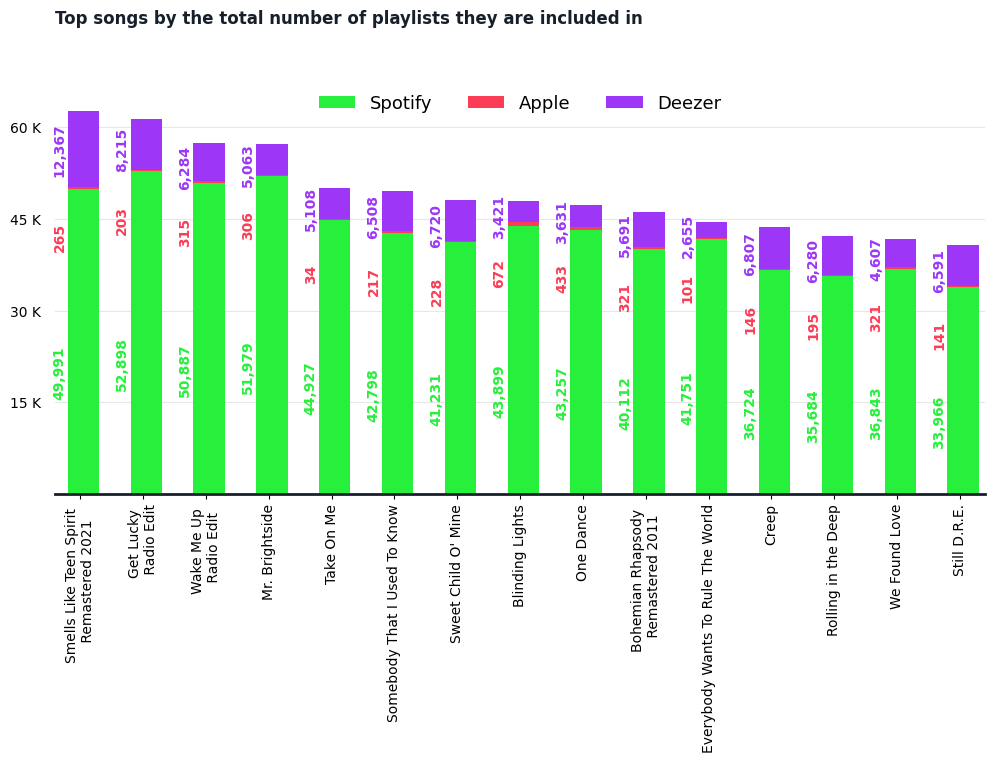

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.margins(x=0)
bars1 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_spotify_playlists'], 
               color='#26F03B', 
               label='Spotify', zorder=5)
bars2 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_apple_playlists'], 
               bottom=in_playlists_data['in_spotify_playlists'], 
               color='#FB3D56', 
               label='Apple', zorder=5)
bars3 = ax.bar(in_playlists_data['track_name'].str.replace('-', '\n'), 
               in_playlists_data['in_deezer_playlists'], 
               bottom= in_playlists_data['in_spotify_playlists'] + in_playlists_data['in_apple_playlists'], 
               color='#9D36F7', 
               label='Deezer', zorder=5)

ax.tick_params(axis='x', rotation=90, )
ax.legend(fontsize=13, ncols=3, loc='upper center', bbox_to_anchor=(0.5, 0.9), 
          fancybox=False, shadow=False, edgecolor='none')
ax.set_ylim(0, 1.15 * ax.get_ylim()[1])
ax.spines[['top', 'right', 'left']].set_visible(False)
ax.spines['bottom'].set(lw=2, color='#17202A', zorder=10)
ax.tick_params(left=False)

for bar in bars1 + bars2 + bars3:
    bar.set_x(bar.get_x() + 0.2)
    bar.set_width(0.5)
    x = bar.get_x() - 0.02
    ycent = bar.get_y() + bar.get_height()/2
    color = bar.get_facecolor()
    val = bar.get_height()
    if bar in bars2:
        ycent -= 10000
    if bar in bars3:
        ycent -= 4000
    if bar in bars1:
        ycent -= 9000
    ax.annotate(f'{val:,}', xy=(x,ycent), color=color, 
                ha='right', rotation=90, fontweight='bold', va='baseline')
ax.grid(zorder=0, axis='y', alpha=0.3)
#ax.set_yticks([])
ax.set_yticks([15000, 30000, 45000, 60000], 
              ['15 K ', '30 K ', '45 K ', '60 K '])
ax.set_title('Top songs by the total number of playlists they are included in', 
             fontweight='bold', color='#17202A', loc='left')

Smells Like Teen Spirit is the track included in most playlist (across all 3 platforms) wich more than 60 thousand, followed by Get Lucky (Daft Punk), also with more than 60 thusands. The rest of the top 5 are: Wake Me Up (Avicci), Mr. Bridgestone (The killers), Take on Me (a-Ha).

There is a huge gap between the number of playlists including the tracks in Spotify and the other two platforms (Apple Music and Deezer).

## <span style='color:#17202a;font-weight:bold;font-size:80%; background: rgba(38, 230, 57, 0.4); padding: 5px 50px; border-radius:5px;'>>>> Top tracks by total streams</span>

Text(0.0, 1.0, 'Top tracks by number of strems')

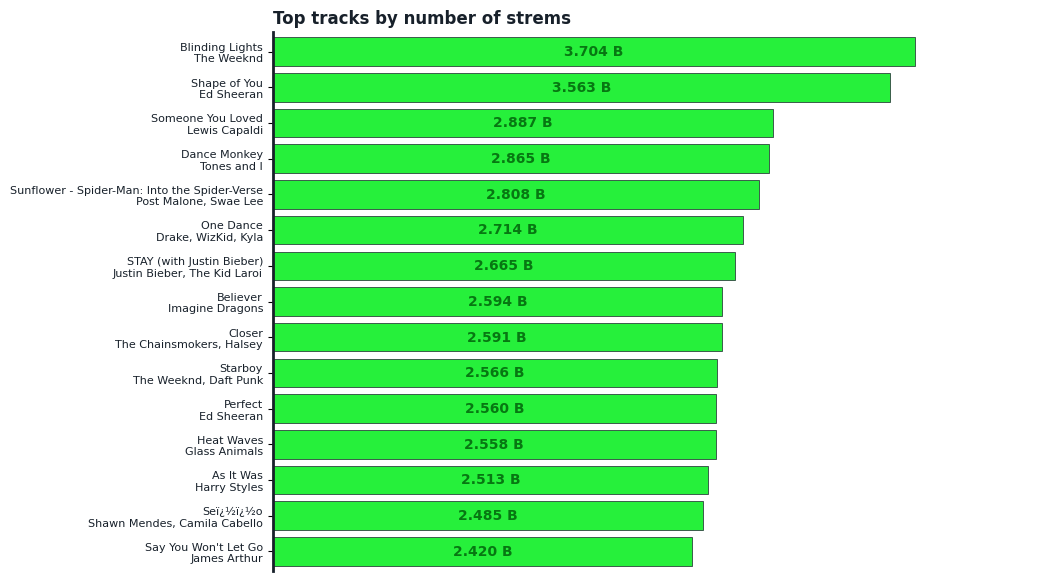

In [17]:
top_tracks_by_streams = (
    data.sort_values(by='streams', ascending=False)
    [['track_name', 'artist(s)_name', 'streams']]
    .head(15)
)

fig, ax = plt.subplots(figsize=(10, 7))
ax.margins(y=0.01)

bars = ax.barh(top_tracks_by_streams.track_name + '\n' + top_tracks_by_streams['artist(s)_name'],
               top_tracks_by_streams.streams,
              color='#26F03B', edgecolor='#17202A', lw=0.5)
ax.tick_params(axis='y', labelsize=8, labelcolor='#17202A')

ax.spines[['bottom', 'top', 'right']].set_visible(False)
ax.spines['left'].set(lw=2, color='#17202A', zorder=5)
ax.set_xlim(0, ax.get_xlim()[1]*1.15)
ax.set_ylim(reversed(ax.get_ylim()))
ax.set_xticks([])

for bar in bars:
    ax.annotate(
        text=f'{bar.get_width()/1_000_000_000:,.3f} B',
        xy = (bar.get_width()/2, bar.get_y() + bar.get_height()/2),
        ha='center', va='center', rotation=0, 
        color='#077712', fontweight='bold', 
        fontsize=10    )
ax.set_title('Top tracks by number of strems', color='#17202A', 
             fontweight='bold', loc='left')

The top list of tracks by the total number of streams is completely different from the top of tracks by the total playlists they're included in.

Blinding Lights (by The Weekend) leads this top with more than 3.7 Billions, followed by Shape of You with more than 3.63 Billions of streams. Only the top 2 songs have more than 3 millions of streams. The next tracks in the top are Someone you Loved by Lewis Capeldi (2.887 Billions), Dance Monkey by Tones and I (2.865 Billions) and Sunflower - Spider Man by Post Malone and Swae Lee (2.808 billions). 

## <span style='color:#17202a;font-weight:bold;font-size:80%; background: rgba(38, 230, 57, 0.4); padding: 5px 50px; border-radius:5px;'>>>> Trends on danceability, valence, ...</span>

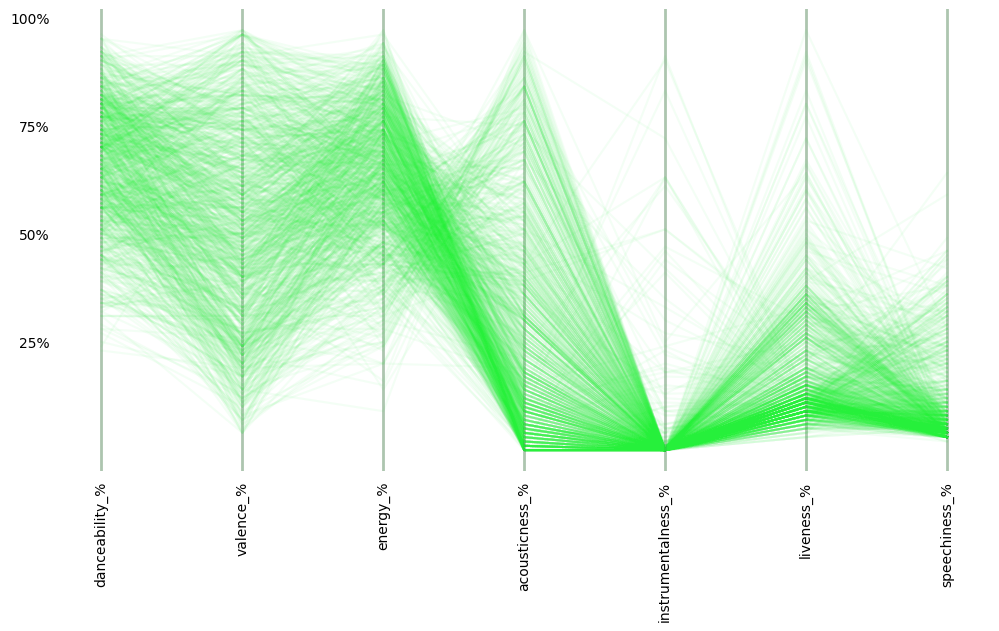

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
cols = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
data_cols = data[cols]

for i in data.index:
    plt.plot(data_cols.iloc[i, :], color='#26F03B', alpha=0.05)
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
ax.grid(True, axis='x', alpha=0.35, lw=2, color='#145B1B')
ax.tick_params(left=False, bottom=False)
ax.yaxis.set_major_locator(plt.MultipleLocator(25))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda vi, yi: f'{vi:.0f}%' if vi>0 else ''))
ax.tick_params(axis='x', rotation=90)

* Popular songs on Spotify typically favor high danceability (less suitable for dancing).
* They also lean towards lower energy levels.
* While the positivity (valence) varies across popular songs, there's no clear preference for a specific range. Similarly, acousticness can be all over the map.
* Interestingly, popular songs tend to have vocals (not instrumental), are typically studio recordings (low liveness), and have minimal spoken word content (low speechness).

<Axes: >

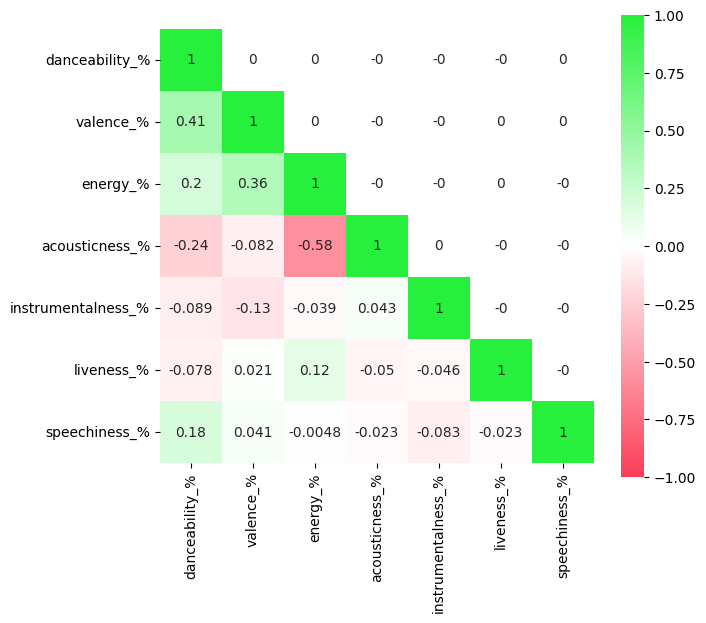

In [19]:
cmap = mpl.colors.LinearSegmentedColormap.from_list('div_green', ['#FB3D56', 'white', '#26F03B'])
cols = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
data_cols = data[cols]

mat = data_cols.corr() * np.tril(np.ones(7)) #* np.abs(np.eye(7)-1)

fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(mat, vmin=-1, vmax=1, cmap=cmap, square=True, 
            annot=True)

Songs with a focus on acoustic instruments typically have lower energy levels and are less danceable. In contrast, dance music is characterized by high energy, positive emotions (high valence), and minimal use of acoustic instruments (low acousticness). Also, positive songs (high valance) have also high energy.